# Importing and visualising the data

In [1]:
import turicreate as tc

values = tc.SFrame("train.csv")

Successfully parsed 1 tokens: 
	0: 3530.16

------------------------------------------------------

1 lines failed to parse correctly


Inferred types from first 100 line(s) of file as 
column_type_hints=[int,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /mnt/c/Users/Shabbir/Documents/ml/train.csv

Parsing completed. Parsed 100 lines in 0.085879 secs.

Successfully parsed 1 tokens: 
	0: 3530

1 lines failed to parse correctly

Finished parsing file /mnt/c/Users/Shabbir/Documents/ml/train.csv

Parsing completed. Parsed 699 lines in 0.115956 secs.

In [2]:
values

x,y
24,21.54945196
50,47.46446305
15,17.21865634
38,36.58639803
87,87.28898389
36,32.46387493
12,10.78089683
81,80.7633986
25,24.61215147
5,6.963319071


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

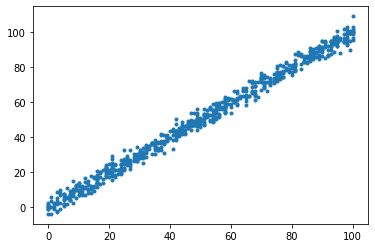

In [4]:
plt.plot(values['x'], values['y'], '.')

##  since data is linear we may not go for polynomial regression

# Cleaning the data

In [5]:
train_data = values[values['y'] != None]

In [6]:
print(values.num_rows())

print(train_data.num_rows())

699
699


# Creating model

In [7]:
model = tc.linear_regression.create(train_data, target='y', features=['x'],
                                    validation_set=None)

Linear regression:

--------------------------------------------------------

Number of examples          : 699

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 1.001122     | 9.149465           | 2.804952                        |

+-----------+----------+--------------+--------------------+---------------------------------+

# Importing test data

In [8]:
test_data=tc.SFrame('test.csv')

SUCCESS: Optimal solution found.

Finished parsing file /mnt/c/Users/Shabbir/Documents/ml/test.csv

Parsing completed. Parsed 100 lines in 0.137265 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /mnt/c/Users/Shabbir/Documents/ml/test.csv

Parsing completed. Parsed 300 lines in 0.094713 secs.

# cleaning test data and plotting the predictions

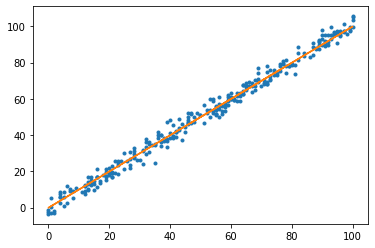

In [9]:
test_data=test_data[test_data['y'] != None]

plt.plot(test_data['x'] , test_data['y'], '.',
        test_data['x'], model.predict(test_data), '-')